<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [5]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros((len(V[0]), 1))
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)
    return result

def test_sum_prod():
    X1 = [np.array([[1, 0], [0, 1]])]
    V1 = [np.array([[1], [1]])]
    expected1 = np.array([[1], [1]])
    assert np.array_equal(sum_prod(X1, V1), expected1), "test failed"

    X2 = [np.array([[0, 0], [0, 0]]), np.array([[1, 0], [0, 1]])]
    V2 = [np.array([[0], [0]]), np.array([[1], [1]])]
    expected2 = np.array([[1], [1]])
    assert np.array_equal(sum_prod(X2, V2), expected2), "test failed"

    print("pass")

test_sum_prod()

pass


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [6]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

def test_binarize():
    M1 = np.array([[0.2, 0.6], [0.8, 0.4]])
    expected1 = np.array([[0, 1], [1, 0]])
    assert np.array_equal(binarize(M1, 0.5), expected1), "test failed"

    M2 = np.array([[0.7, 0.8], [0.6, 0.9]])
    expected2 = np.array([[0, 1], [0, 1]])
    assert np.array_equal(binarize(M2, 0.7), expected2), "test failed"

    print("pass")

test_binarize()

pass


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [12]:
def unique_rows(mat):
    return [list(set(row)) for row in mat]

def unique_columns(mat):
    if not mat:
        return []
    
    num_columns = len(mat[0])
    unique_cols = []
    
    for col_index in range(num_columns):
        column = [mat[row_index][col_index] for row_index in range(len(mat))]
        unique_cols.append(list(set(column)))
    
    return unique_cols

def test_unique_rows():
    mat = [
        [1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]
    ]
    assert unique_rows(mat) == [
        [1],
        [2],
        [3]
    ], "test failed"

    mat = []
    assert unique_rows(mat) == [], "test failed"

    print("pass 1")

def test_unique_columns():
    mat = [
        [1, 2],
        [1, 2],
        [1, 2]
    ]
    assert unique_columns(mat) == [
        [1],
        [2]
    ], "test failed"

    mat = []
    assert unique_columns(mat) == [], "test failed"

    print("pass 2")

test_unique_rows()
test_unique_columns()

pass 1
pass 2


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

column means: [-0.24743352 -0.22503924  0.41332342  0.1385879 ]
column variances: [1.63059381 0.87318966 0.09433716 0.71964376]
row means: [ 0.39363554  0.27321175 -1.20597307  0.96283824 -0.32441426]
row variances: [0.08803022 0.1335285  0.88174083 0.13396975 0.57105554]


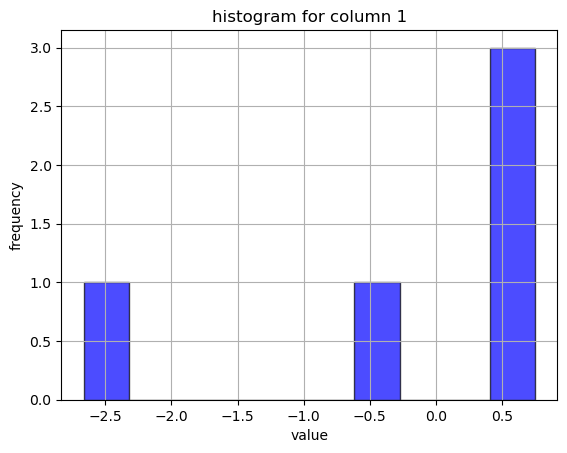

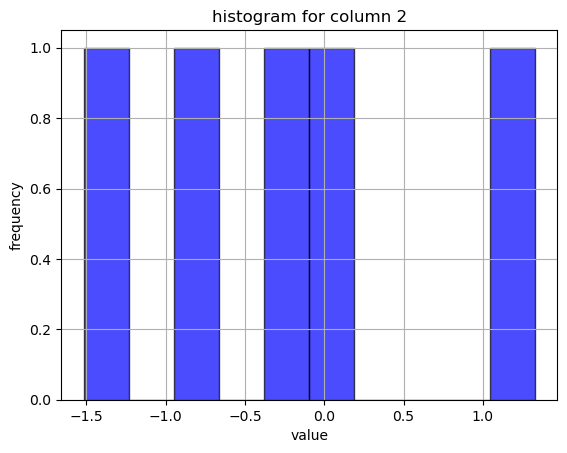

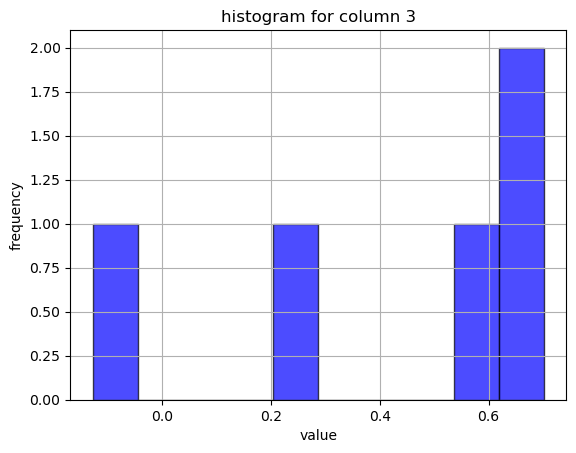

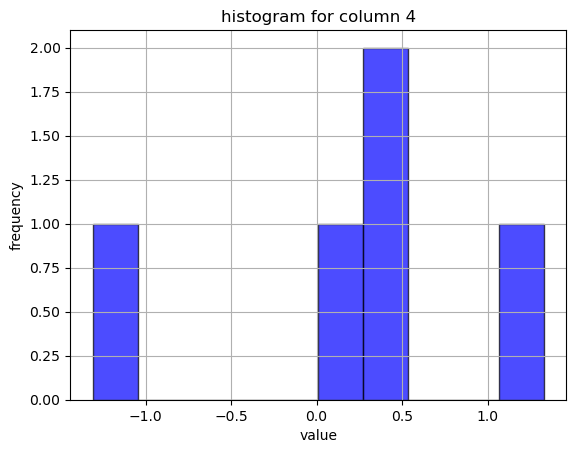

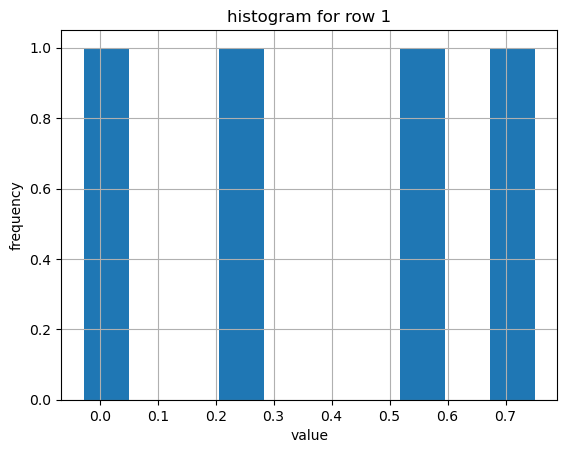

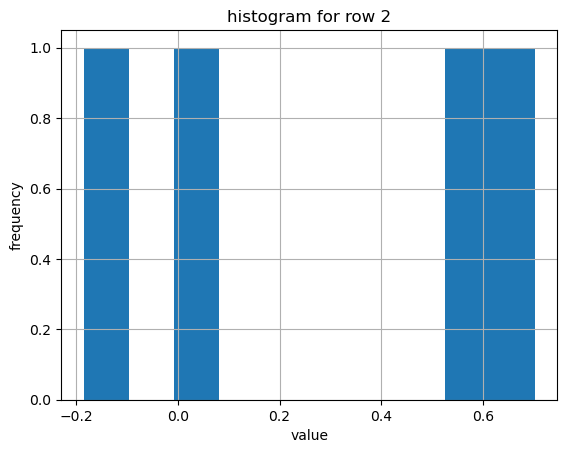

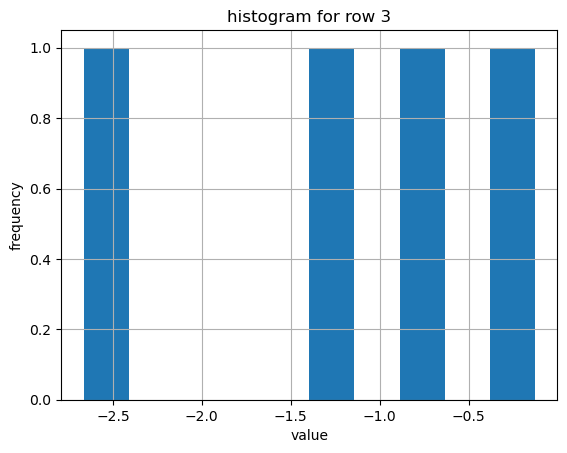

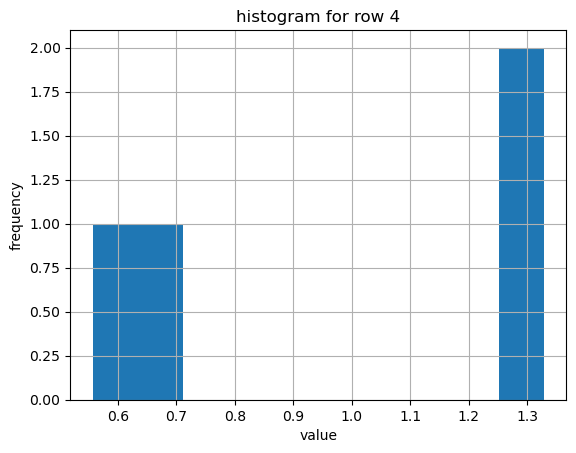

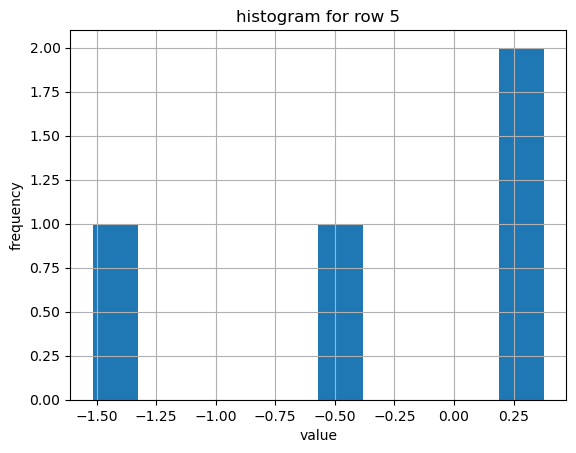

In [19]:
def analyze_matrix(m, n):
    matrix = np.random.randn(m, n)

    column_means = np.mean(matrix, axis=0)
    column_variances = np.var(matrix, axis=0)
 
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)

    print("column means:", column_means)
    print("column variances:", column_variances)
    print("row means:", row_means)
    print("row variances:", row_variances)

    for i in range(n):
        plt.figure()
        plt.hist(matrix[:, i], bins=10, alpha=0.7, color='blue', edgecolor='black')
        plt.title(f'histogram for column {i+1}')
        plt.xlabel('value')
        plt.ylabel('frequency')
        plt.grid(True)
        plt.show()

    for i in range(m):
        plt.figure()
        plt.hist(matrix[i, :], bins=10)
        plt.title(f'histogram for row {i+1}')
        plt.xlabel('value')
        plt.ylabel('frequency')
        plt.grid(True)
        plt.show()

analyze_matrix(5, 4)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [21]:
def chess(m, n, a, b):
    matrix = []
    for i in range(m):
        row = []
        for j in range(n):
            if (i + j) % 2 == 0:
                row.append(a)
            else:
                row.append(b)
        matrix.append(row)
    return matrix

def test_chess():
    result = chess(2, 2, 1, 0)
    expected = [
        [1, 0],
        [0, 1]
    ]
    assert result == expected, "test failed"

    result = chess(4, 4, 1, 2)
    expected = [
        [1, 2, 1, 2],
        [2, 1, 2, 1],
        [1, 2, 1, 2],
        [2, 1, 2, 1]
    ]
    assert result == expected, "test failed"


    print("pass")

test_chess()

pass


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

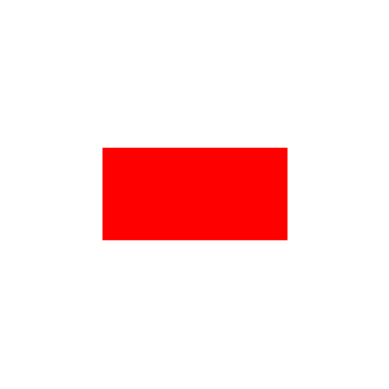

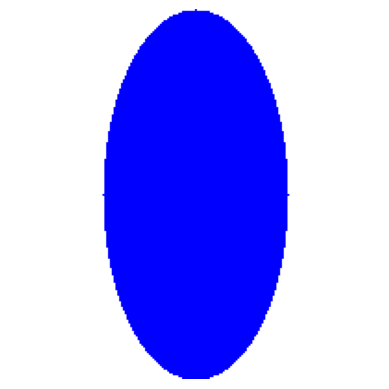

In [22]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.ones((m, n, 3), dtype=np.uint8) * np.array(background_color, dtype=np.uint8)

    start_x = (n - a) // 2
    start_y = (m - b) // 2

    image[start_y:start_y + b, start_x:start_x + a] = rectangle_color

    plt.imshow(image)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.ones((m, n, 3), dtype=np.uint8) * np.array(background_color, dtype=np.uint8)

    x0, y0 = n // 2, m // 2

    for y in range(m):
        for x in range(n):
            if ((x - x0) ** 2) / a ** 2 + ((y - y0) ** 2) / b ** 2 <= 1:
                image[y, x] = ellipse_color

    plt.imshow(image)
    plt.axis('off')
    plt.show()

def test_draw_rectangle():
    draw_rectangle(100, 50, 200, 200, (255, 0, 0), (255, 255, 255))  

def test_draw_ellipse():
    draw_ellipse(50, 100, 200, 200, (0, 0, 255), (255, 255, 255)) 

test_draw_rectangle()
test_draw_ellipse()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [25]:
time_series = np.array([1, 3, 7, 1, 2, 6, 0, 1, 3, 2, 1, 5, 4, 3])

mean = np.mean(time_series)
print(f"Математическое ожидание: {mean}")

variance = np.var(time_series)
print(f"Дисперсия: {variance}")

std_dev = np.std(time_series)
print(f"Стандартное отклонение: {std_dev}")

local_maxima = []
local_minima = []

for i in range(1, len(time_series) - 1):
    if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
        local_maxima.append((i, time_series[i]))
    if time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]:
        local_minima.append((i, time_series[i]))

print(f"Локальные максимумы: {local_maxima}")
print(f"Локальные минимумы: {local_minima}")

def moving_average(series, p):
    return np.convolve(series, np.ones(p)/p, mode='valid')

p = 3
moving_avg_series = moving_average(time_series, p)
print(f"Скользящее среднее (p={p}): {moving_avg_series}")

Математическое ожидание: 2.7857142857142856
Дисперсия: 4.025510204081632
Стандартное отклонение: 2.006367415026877
Локальные максимумы: [(2, 7), (5, 6), (8, 3), (11, 5)]
Локальные минимумы: [(3, 1), (6, 0), (10, 1)]
Скользящее среднее (p=3): [3.66666667 3.66666667 3.33333333 3.         2.66666667 2.33333333
 1.33333333 2.         2.         2.66666667 3.33333333 4.        ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [27]:
def one_hot_encode(labels):
    num_classes = max(labels) + 1

    one_hot_matrix = [[0] * num_classes for _ in range(len(labels))]

    for i, label in enumerate(labels):
        one_hot_matrix[i][label] = 1
    
    return one_hot_matrix


def test_one_hot_encode():
    labels = [0, 2, 3, 0]
    one_hot_encoded = one_hot_encode(labels)
    expected_output = [
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0]
    ]
    assert one_hot_encoded == expected_output, "test failed"

    labels = [0, 0, 0]
    one_hot_encoded = one_hot_encode(labels)
    expected_output = [
        [1],
        [1],
        [1]
    ]
    assert one_hot_encoded == expected_output, "test failed"


    print("pass")

test_one_hot_encode()

pass
